<a href="https://colab.research.google.com/github/Ammon-Snell/Machine-Learning-Exercise/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Finding Correlation Between Income**

# Loading Data Into the Workbook

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [4]:
adult_df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Project 2 Datasets/adult.csv')

In [5]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


  This data from kaggle contains basic information on individuals and focuses on their income as the target. Each row of data represents one person. Since our target is an object and not an int or float datatype, this will be handled using classification tools. As the data has 15 columns, there are 14 features in the Dataset. There are 48842 rows in this dataset. The immediate issue I see with this dataset is the large amount of different values in occupation causing some issues with a onehotencoder

In [6]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Clean Data to Prepare for Pre-Processing

In [7]:
# Check for duplicates
adult_df.duplicated().sum()

52

In [8]:
adult_df = adult_df.drop_duplicates()

In [9]:
adult_df.duplicated().sum()

0

In [10]:
# Check for incorrect values in columns
adult_df['age'].value_counts()

36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [11]:
adult_df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
adult_df.drop(adult_df[(adult_df['workclass'] =='?')].index, inplace=True)

adult_df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [13]:
adult_df['education'].value_counts()

HS-grad         14960
Some-college    10026
Bachelors        7761
Masters          2589
Assoc-voc        1977
11th             1634
Assoc-acdm       1529
10th             1241
7th-8th           844
Prof-school       810
9th               687
12th              597
Doctorate         576
5th-6th           466
1st-4th           227
Preschool          71
Name: education, dtype: int64

In [14]:
adult_df['marital-status'].value_counts()

Married-civ-spouse       21439
Never-married            14850
Divorced                  6361
Separated                 1433
Widowed                   1296
Married-spouse-absent      584
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [15]:
adult_df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
?                      10
Name: occupation, dtype: int64

In [16]:
adult_df.drop(adult_df[(adult_df['occupation'] =='?')].index, inplace=True)

adult_df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [17]:
adult_df['relationship'].value_counts()

Husband           18992
Not-in-family     11892
Own-child          6696
Unmarried          4866
Wife               2139
Other-relative     1400
Name: relationship, dtype: int64

In [18]:
adult_df['race'].value_counts()

White                 39400
Black                  4354
Asian-Pac-Islander     1421
Amer-Indian-Eskimo      435
Other                   375
Name: race, dtype: int64

In [19]:
adult_df['gender'].value_counts()

Male      31081
Female    14904
Name: gender, dtype: int64

In [20]:
adult_df['native-country'].value_counts()

United-States                 41256
Mexico                          895
?                               810
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                        

We can see a substantially higher number of U.S. citizens compared to non-U.S. citizens. We will combine the other columns to compare the U.S. to the rest of the world on average.

In [21]:
adult_df.drop(adult_df[(adult_df['native-country'] =='?')].index, inplace=True)

adult_df['native-country'].value_counts()

United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [22]:
adult_df['income'].value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

# Visualize Data

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-gain'>

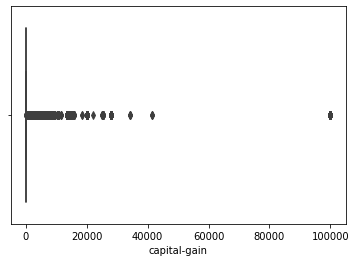

In [23]:
sns.boxplot('capital-gain', data=adult_df)

This plot demonstrates that any amount of capital gains is an outlier

Text(0, 0.5, 'Number of Adults')

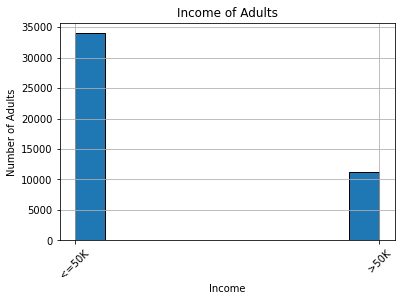

In [24]:
ax = adult_df['income'].hist(edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Income of Adults')
ax.set_xlabel('Income')
ax.set_ylabel('Number of Adults')

Text(0, 0.5, 'Number of Adults')

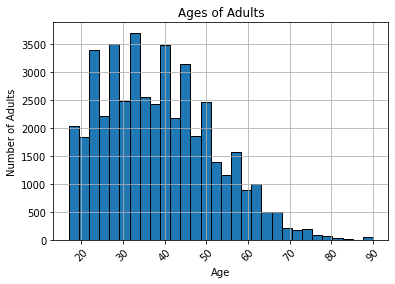

In [25]:
ax = adult_df['age'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Ages of Adults')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Adults')

most of the adults in the data are around 20 to 40 years old

<AxesSubplot:>

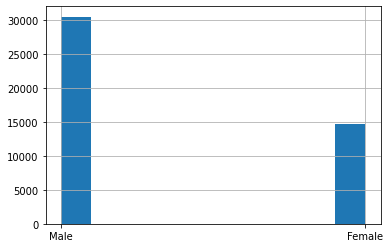

In [26]:
adult_df['gender'].hist()

We can see here that men make up approximately 2/3rds of our dataset. This could overrepresent men in our data which may cause issues with our data when predicting for women.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

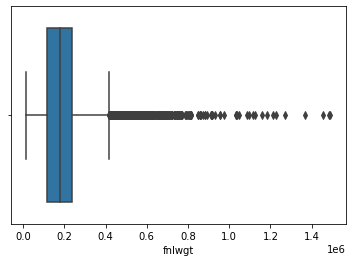

In [27]:
sns.boxplot('fnlwgt', data=adult_df)

Text(0, 0.5, 'Number of Adults')

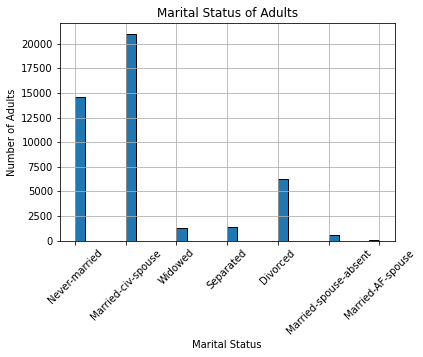

In [28]:
ax = adult_df['marital-status'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Marital Status of Adults')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Number of Adults')

Text(0, 0.5, 'Number of Adults')

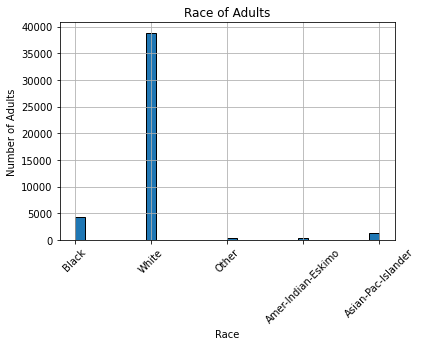

In [29]:
ax = adult_df['race'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Race of Adults')
ax.set_xlabel('Race')
ax.set_ylabel('Number of Adults')

We can see that White is heavily overepresented in comparison to the other races in this data. It may be useful to combine the non-white data into one column.

Text(0, 0.5, 'Number of Adults')

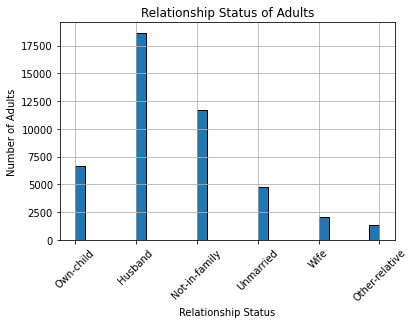

In [30]:
ax = adult_df['relationship'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Relationship Status of Adults')
ax.set_xlabel('Relationship Status')
ax.set_ylabel('Number of Adults')

According to the chart, husbands are present at a substantially higher rate than wives. This is possibly due to men in the household working while women take care of the kids

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

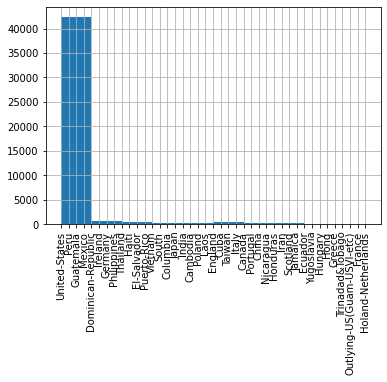

In [33]:
adult_df['native-country'].hist()
plt.xticks(rotation = 90)

Text(0, 0.5, 'Number of Adults')

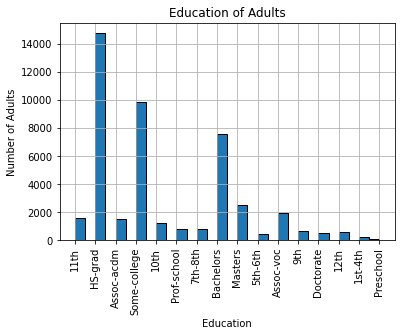

In [32]:
ax = adult_df['education'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 90)
ax.set_title('Education of Adults')
ax.set_xlabel('Education')
ax.set_ylabel('Number of Adults')

The majority of adults in the data are highschool graduates, have some college or have a bachelor's degree.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

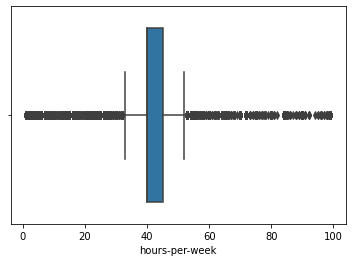

In [29]:
sns.boxplot('hours-per-week', data=adult_df)

This chart demonstrates that most adults seem to work around 30-50 hours per week

Text(0, 0.5, 'Number of Adults')

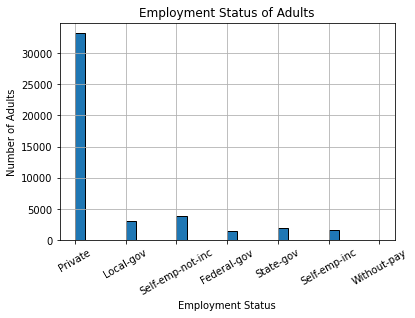

In [43]:
ax = adult_df['workclass'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 30)
ax.set_title('Employment Status of Adults')
ax.set_xlabel('Employment Status')
ax.set_ylabel('Number of Adults')

This chart shows that most adults are employed by a private company

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

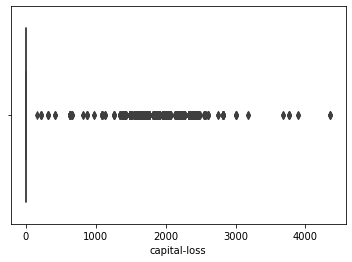

In [31]:
sns.boxplot('capital-loss', data=adult_df)

<AxesSubplot:>

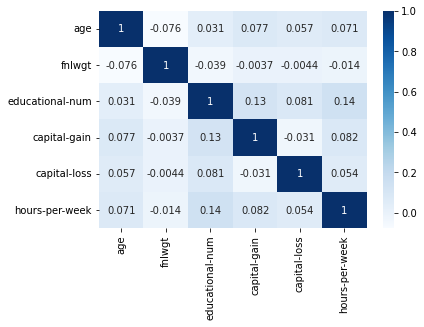

In [32]:
import seaborn as sns
corr = adult_df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

None of the numeric columns seem to correlate with each other very strongly. Since the only columns with a correlation having an absolute value of more than .1 are hours per week, capital gains and education number, we will create multivariate plots looking more closely at these.

In [37]:
# group hours per week by educational level
NUEN = adult_df.groupby(['educational-num'])['hours-per-week'].nunique()
NUEN

educational-num
1     18
2     39
3     42
4     58
5     54
6     60
7     65
8     49
9     92
10    82
11    64
12    64
13    73
14    65
15    50
16    45
Name: hours-per-week, dtype: int64

In [38]:
# Can convert to NumPy array or list
unique_educationalNumbers = np.array(NUEN.index)
unique_educationalNumbers

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [39]:
numhours = np.array(NUEN.values)
numhours

array([18, 39, 42, 58, 54, 60, 65, 49, 92, 82, 64, 64, 73, 65, 50, 45])

In [34]:
# Make the style by default seaborn
plt.style.use('seaborn')

Text(0, 0.5, 'Hours per Week')

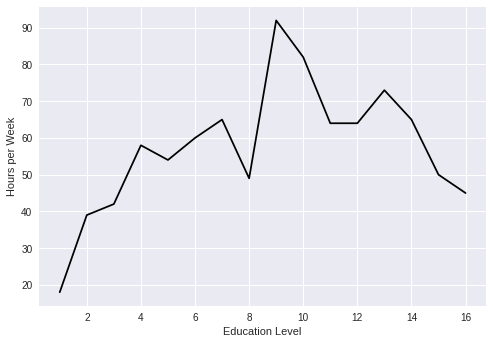

In [40]:
# Plot graph showing how it would look with defaults
plt.plot(unique_educationalNumbers, numhours, c= 'k')
plt.xlabel('Education Level')
plt.ylabel('Hours per Week')

While the general trend is that education level increases the hours worked per week, it also shows that the slope reverses once education hits highschool level.

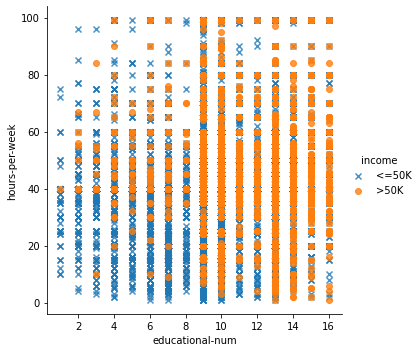

In [32]:
sns.lmplot(x='educational-num', y='hours-per-week', hue='income', 
           markers=['x', 'o'],
           fit_reg=False, data=adult_df)

The information in this chart definitely seems to suggest that there is a clear correlation between income and education level. There is less of a correlation between income and hours worked.

In [41]:
# get number of olympians per year
NUEN = adult_df.groupby(['educational-num'])['capital-gain'].nunique()
NUEN

educational-num
1       5
2       8
3      17
4      40
5      27
6      33
7      39
8      18
9     102
10     87
11     53
12     46
13     76
14     59
15     30
16     31
Name: capital-gain, dtype: int64

In [42]:
# Can convert to NumPy array or list
unique_educationalNumbers = np.array(NUEN.index)
unique_educationalNumbers

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [43]:
allthegainz = np.array(NUEN.values)
allthegainz

array([  5,   8,  17,  40,  27,  33,  39,  18, 102,  87,  53,  46,  76,
        59,  30,  31])

Text(0, 0.5, 'Capital Gains')

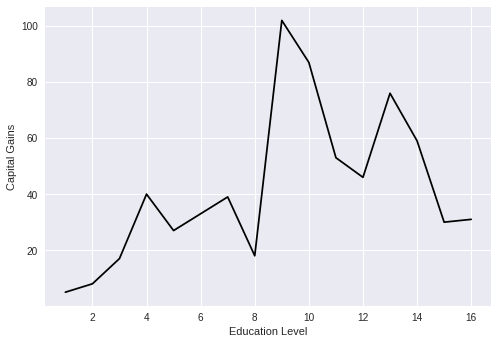

In [44]:
# Plot graph showing how it would look with defaults
plt.plot(unique_educationalNumbers, allthegainz, c= 'k')
plt.xlabel('Education Level')
plt.ylabel('Capital Gains')

<AxesSubplot:xlabel='income', ylabel='educational-num'>

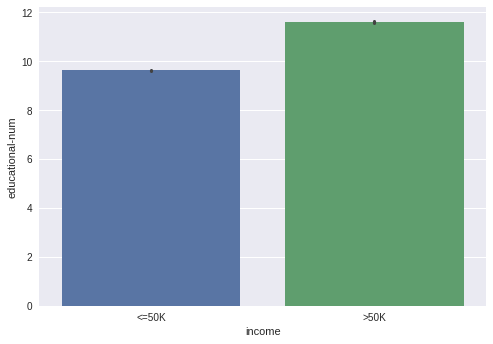

In [45]:
sns.barplot(data=adult_df, x="income", y="educational-num")

I picked these two charts because they highlight an interesting trend. Essentially, the higher an individuals education level, the higher the number of hours worked per week. However this also demonstrates that once graduation from highschool has been achieved, the trend reverses and fewer hours are worked.

I also picked the income chart because it shows that the average educational number for those who make over 50k a year is more than that of those who make less as expected

# **Take the data through the appropriate pre-processing steps**

In [46]:
#train_test split the data before performing any imputing 
X = adult_df.drop(columns=['income'])
y = adult_df['income']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [48]:
# Create a PCA object that will retain 95% of the variance when transforming
pca = PCA(n_components=.95)
# Combine the scaler and the PCA in a pipeline.
pca_pipe = make_pipeline(scaler, pca)

In [49]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
pca_num_tuple = (pca_pipe, num_selector)
num_tuple = (scaler,num_selector)
cat_tuple = (ohe, cat_selector)

In [50]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
pca_transformer = make_column_transformer(pca_num_tuple, cat_tuple, remainder='passthrough')

In [51]:
# fit ColumnTransformer on the training data
col_transformer.fit(X_train)
pca_transformer.fit(X_train)
# transform both the training and testing data (this will output a NumPy array)
X_train_transformed = col_transformer.transform(X_train)
X_train_pca =pca_transformer.transform(X_train)
X_test_pca =pca_transformer.transform(X_test)
X_test_transformed = col_transformer.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Create KNN Model without PCA**

In [49]:
%%time
# Create and fit a KNN model WITHOUT PCA.
knn = KNeighborsClassifier(n_neighbors=1)

knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_transformed, y_train)

CPU times: user 90.4 ms, sys: 8.57 ms, total: 99 ms
Wall time: 99.2 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [50]:
%%time
# Make predictions and evaluate the model using classification_report
#making predictions
predictions = knn_pipe.predict(X_test_transformed)
predictions

CPU times: user 8.18 s, sys: 138 ms, total: 8.32 s
Wall time: 6.96 s


array(['<=50K', '>50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [51]:
#Evaluate
acc_score = knn_pipe.score(X_test_transformed, y_test)
knn_test_precision = precision_score(y_test, predictions, pos_label='<=50K')
knn_test_recall = recall_score(y_test, predictions, pos_label='<=50K')
print(f'Accuracy: {acc_score}')
print(f'Precision: {knn_test_precision}')
print(f'Recall: {knn_test_recall}')

Accuracy: 0.7910313166092802
Precision: 0.8585761554061266
Recall: 0.8679326715580492


In [52]:
knn_report = classification_report(y_test, predictions)
print('Classification Report')
print(knn_report)

Classification Report
              precision    recall  f1-score   support

       <=50K       0.86      0.87      0.86      9268
        >50K       0.57      0.55      0.56      2930

    accuracy                           0.79     12198
   macro avg       0.71      0.71      0.71     12198
weighted avg       0.79      0.79      0.79     12198



# **Incorporate PCA into KNN model**

In [53]:
%%time
# Create and fit a KNN model WITH PCA.
knn_pca_pipe = make_pipeline(scaler, pca, knn)
knn_pca_pipe.fit(X_train_transformed, y_train)

CPU times: user 1.23 s, sys: 220 ms, total: 1.45 s
Wall time: 899 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [54]:
# Remake Pipeline and let grid search tell us the best hyper parameters
pipe2 = make_pipeline(
    scaler,
    pca,
    knn
)

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "standardscaler__with_mean": [True, False], 
    "standardscaler__with_std": [True, False],
    "pca__n_components": [1,2,3,4,5,6,7,8,9,10], # 10 components explains the most variance
    "kneighborsclassifier__n_neighbors": [1,2,3,4,5,6,7,8,9,10]
#    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
#    "logisticregression__max_iter": [100, 500, 1000, 2000, 2500]
}

grid = GridSearchCV(
    pipe2, 
    param_grid=param_grid, 
    cv=5, 
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


KeyboardInterrupt: ignored

In [ ]:
grid_df = pd.DataFrame(grid.cv_results_)

In [ ]:
# Best Parameters
grid.best_params_

In [ ]:
# Lets use the best model to predict our values
pred = grid.best_estimator_.predict(X_test_transformed)
print(classification_report(y_test, pred))

# **Logistic Regression**

In [56]:
logreg_noPCA = LogisticRegression(max_iter=2085) # Set max_iter so model reaches convergence
logreg = LogisticRegression()

In [57]:
# Measure how long it takes to train without PCA

%timeit logreg_noPCA.fit(X_train_transformed, y_train)

4.1 s ± 804 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
# Measure how long it takes to train with PCA

%timeit logreg.fit(X_train_pca, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

1.61 s ± 179 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# Checking the accurancy of our model with PCA 
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Testing accuracy: 0.8519429414658141


In [60]:
print('Testing accuracy:', logreg_noPCA.score(X_test_transformed, y_test))

Testing accuracy: 0.8520249221183801


In [61]:
# Remake Pipeline and let grid search tell us the best hyper parameters
pipe2 = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression()
)

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "standardscaler__with_mean": [True, False], 
    "standardscaler__with_std": [True, False],
    "pca__n_components": [1,2,3,4,5,6,7,8,9,10], # 10 components explains the most variance
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    "logisticregression__max_iter": [100, 500, 1000, 2000, 2500]
}

grid = GridSearchCV(
    pipe2, 
    param_grid=param_grid, 
    cv=5, 
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1, 0.9, 0.8, 0.7, 0.6, 0.5,
                                                   0.4, 0.3, 0.2, 0.1],
                         'logisticregression__max_iter': [100, 500, 1000, 2000,
                                                          2500],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=2)

In [64]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.068296,0.127373,0.073310,0.020244,1,100,1,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.798470,0.798606,0.798169,0.795299,0.800219,0.798153,0.001595,1957
1,0.531339,0.065016,0.034655,0.003781,1,100,1,True,False,"{'logisticregression__C': 1, 'logisticregressi...",0.807897,0.810220,0.815797,0.810057,0.814430,0.811680,0.002952,1841
2,0.464364,0.007400,0.030478,0.000541,1,100,1,False,True,"{'logisticregression__C': 1, 'logisticregressi...",0.798470,0.798606,0.798306,0.795299,0.800219,0.798180,0.001596,1924
3,0.493118,0.035607,0.034386,0.003565,1,100,1,False,False,"{'logisticregression__C': 1, 'logisticregressi...",0.807897,0.810220,0.815797,0.810057,0.814430,0.811680,0.002952,1841
4,0.511748,0.031920,0.036048,0.001367,1,100,2,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.816642,0.820331,0.821536,0.816343,0.825909,0.820152,0.003519,1555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.940593,0.201000,0.045949,0.019925,0.1,2500,9,False,False,"{'logisticregression__C': 0.1, 'logisticregres...",0.839732,0.839186,0.847499,0.843673,0.844220,0.842862,0.003076,181
1996,0.683460,0.025023,0.035900,0.002705,0.1,2500,10,True,True,"{'logisticregression__C': 0.1, 'logisticregres...",0.832081,0.836316,0.836021,0.832605,0.839984,0.835401,0.002866,426
1997,0.630273,0.014687,0.041035,0.005573,0.1,2500,10,True,False,"{'logisticregression__C': 0.1, 'logisticregres...",0.839459,0.838503,0.846816,0.843536,0.841350,0.841933,0.002988,273
1998,0.651153,0.043224,0.034891,0.002689,0.1,2500,10,False,True,"{'logisticregression__C': 0.1, 'logisticregres...",0.832627,0.836316,0.835474,0.832331,0.838754,0.835101,0.002398,485


In [65]:
parameters = ['param_logisticregression__max_iter','param_pca__n_components','param_standardscaler__with_mean','param_standardscaler__with_std','mean_test_score','rank_test_score']

grid_df[parameters]

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
0,100,1,True,True,0.798153,1957
1,100,1,True,False,0.811680,1841
2,100,1,False,True,0.798180,1924
3,100,1,False,False,0.811680,1841
4,100,2,True,True,0.820152,1555
...,...,...,...,...,...,...
1995,2500,9,False,False,0.842862,181
1996,2500,10,True,True,0.835401,426
1997,2500,10,True,False,0.841933,273
1998,2500,10,False,True,0.835101,485


In [66]:
# Best Parameters
grid.best_params_

{'logisticregression__C': 1,
 'logisticregression__max_iter': 100,
 'pca__n_components': 8,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': False}

In [67]:
# Best Scoring Model
grid.best_score_

0.8432719468595871

In [69]:
# Lets use the best model to predict our values
pred = grid.best_estimator_.predict(X_test_pca)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.79      0.80      9268
        >50K       0.38      0.41      0.40      2930

    accuracy                           0.70     12198
   macro avg       0.60      0.60      0.60     12198
weighted avg       0.71      0.70      0.70     12198

